In [1]:
# Import Libraries
import numpy as np
import pandas as pd

In [3]:
# Load the Movie Lens Data
data=pd.read_csv('movie.data',sep="\t",names=["UserID","ItemID","Ratings","TimeStamps"])
data.head()

,UserID,ItemID,Ratings,TimeStamps
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [8]:
# Load the Movie Titles
movie_title=pd.read_csv("MovieIDTitles")
movie_title.head()

,ItemID,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
df=pd.merge(data,movie_title,on="ItemID")
df.head()

,UserID,ItemID,Ratings,TimeStamps,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


#### EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

#### Create a ratings dataframe with average ratings and number of ratings

In [13]:
df.groupby("title")["Ratings"].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Ratings, dtype: float64

In [15]:
df.groupby("title")["Ratings"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Ratings, dtype: int64

In [17]:
ratings=pd.DataFrame(df.groupby("title")["Ratings"].mean())
ratings.head()

,Ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [18]:
ratings["Number Of Ratings"]=pd.DataFrame(df.groupby("title")["Ratings"].count())
ratings.head()

,Ratings,Number Of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


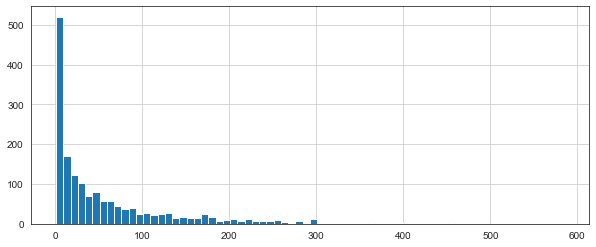

In [19]:
plt.figure(figsize=(10,4))
ratings["Number Of Ratings"].hist(bins=70)

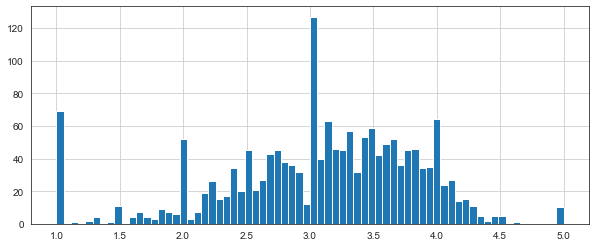

In [20]:
plt.figure(figsize=(10,4))
ratings["Ratings"].hist(bins=70)

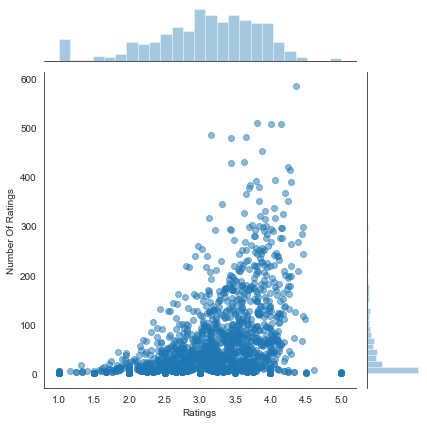

In [22]:
sns.jointplot(x="Ratings",y="Number Of Ratings",data=ratings,alpha=0.5)

#### Recommending Similar Movies

In [25]:
moviemat=df.pivot_table(index="UserID",columns="title",values="Ratings")
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
UserID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ratings.sort_values("Number Of Ratings",ascending=False).head(10)

,Ratings,Number Of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [29]:
# Check the User Ratings of 2 movies
starwars_user_ratings=moviemat["Star Wars (1977)"]
liarliar_user_ratings=moviemat["Liar Liar (1997)"]
starwars_user_ratings.head()


UserID
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [30]:
# Used corrwith() method to get correlation between 2 pandas series
similar_to_star_wars=moviemat.corrwith(starwars_user_ratings)
similar_to_liar_liar=moviemat.corrwith(liarliar_user_ratings)

C:\Users\Krishna\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Krishna\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


#### Remove NaN values and use a dataframe instead of series

In [31]:
coor_starwars=pd.DataFrame(similar_to_star_wars,columns=["Correlation"])
coor_starwars.dropna(inplace=True)
coor_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [34]:
coor_starwars.sort_values("Correlation",ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [36]:
coor_starwars=coor_starwars.join(ratings["Number Of Ratings"])
coor_starwars.head()

,Correlation,Number Of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [37]:
coor_starwars[coor_starwars["Number Of Ratings"]>100].sort_values("Correlation",ascending=False).head()

,Correlation,Number Of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [38]:
# same steps for Liar Liar Movie
coor_liar_liar=pd.DataFrame(similar_to_liar_liar,columns=["Correlation"])
coor_liar_liar.dropna(inplace=True)
coor_liar_liar=coor_liar_liar.join(ratings["Number Of Ratings"])
coor_liar_liar[coor_liar_liar["Number Of Ratings"]>100].sort_values("Correlation",ascending=False).head()


,Correlation,Number Of Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
